In [1]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
nltk.download('stopwords')
stop = stopwords.words('english')
tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass


In [3]:
data_dev = []
data_test = []
data_train = []
file_name_dev = "audioDataDev.pickle"
file_name_test = "audioDataTest.pickle"
file_name_train = "audioDataTrain.pickle"

with (open(file_name_dev, "rb")) as f:
    while True:
        try:
            data_dev.append(pickle.load(f))
        except EOFError:
            break
f.close()

with (open(file_name_test, "rb")) as f:
    while True:
        try:
            data_test.append(pickle.load(f))
        except EOFError:
            break
f.close()

with (open(file_name_train, "rb")) as f:
    while True:
        try:
            data_train.append(pickle.load(f))
        except EOFError:
            break
f.close()

In [4]:
X_dev = []
y_dev = []
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(data_dev)-1):
    X_dev.append(data_dev[i+1][4])
for i in range(len(data_dev)-1):
    y_dev.append(data_dev[i+1][6:12])
    
for i in range(len(data_test)-1):
    X_test.append(data_test[i+1][4])
for i in range(len(data_test)-1):
    y_test.append(data_test[i+1][6:12])
    
for i in range(len(data_train)-1):
    X_train.append(data_train[i+1][4])
for i in range(len(data_train)-1):
    y_train.append(data_train[i+1][6:12])

X_dev = np.array(X_dev)
y_dev = np.array(y_dev).astype(bool).astype(int)
X_test = np.array(X_test)
y_test = np.array(y_test).astype(bool).astype(int)
X_train = np.array(X_train)
y_train = np.array(y_train).astype(bool).astype(int)


In [5]:
def sent(X, y):
    data = []
    for i in range(1, len(X)):
        #add text
        temp = X[i].split('\n')
        text_obj = temp[0][6:]

        row = [text_obj, np.array(y[i])]
        data.append(row)

    df = pd.DataFrame(data, columns = ['text', 'sentiment'])
    return df

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_stopwords(text):
    sw = stopwords.words('english')
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

def sequences(dframe):
    tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
    tokenizer.fit_on_texts(dframe['text'])
    X = tokenizer.texts_to_sequences(dframe['text'].values)
    y = dframe['sentiment'].values
    return X,y


In [6]:
dev_df = sent(X_dev, y_dev)
dev_df['text'] = dev_df['text'].apply(remove_punctuation).apply(remove_stopwords)
dev = sequences(dev_df)

test_df = sent(X_test, y_test)
test_df['text'] = test_df['text'].apply(remove_punctuation).apply(remove_stopwords)
test = sequences(test_df)

train_df = sent(X_train, y_train)
train_df['text'] = train_df['text'].apply(remove_punctuation).apply(remove_stopwords)
train = sequences(train_df)

In [7]:
X_dev_text = pad_sequences(dev[0])
y_dev_text = pad_sequences(dev[1])
X_test_text = pad_sequences(test[0])
y_test_text = pad_sequences(test[1])
X_train_text = pad_sequences(train[0])
y_train_text = pad_sequences(train[1])

In [8]:
X_train_text = X_train_text.reshape(X_train_text.shape[0], 1, X_train_text.shape[1])
X_test_text = X_test_text.reshape(X_test_text.shape[0], 1, X_test_text.shape[1])

In [9]:
X_train_text.shape

(16326, 1, 9)

In [19]:
#set up the LSTM model


#using the LSTM model with relu activation
lstm = keras.Sequential()
lstm.add(LSTM(32, input_shape = (1, X_train_text.shape[2]), activation='relu', return_sequences=False))
lstm.add(Dense(6))
lstm.compile(loss='mean_squared_error',metrics='accuracy', optimizer='adam')

In [20]:
y_train_text.shape

(16326, 6)

In [21]:
lstm.fit(X_train_text, y_train_text, epochs=30, batch_size=10, verbose=1, shuffle=False)

Epoch 1/30
1633/1633 [==============================] - 4s 2ms/step - loss: 2966.5417 - accuracy: 0.1264
Epoch 2/30
1633/1633 [==============================] - 3s 2ms/step - loss: 26.5794 - accuracy: 0.0580
Epoch 3/30
1633/1633 [==============================] - 3s 2ms/step - loss: 5.2189 - accuracy: 0.1566
Epoch 4/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0.9182 - accuracy: 0.6440
Epoch 5/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0.3911 - accuracy: 0.6616
Epoch 6/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0.1927 - accuracy: 0.6752
Epoch 7/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0.1559 - accuracy: 0.6816
Epoch 8/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0.1546 - accuracy: 0.6816
Epoch 9/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0.1544 - accuracy: 0.6816
Epoch 10/30
1633/1633 [==============================] - 3s 2ms/step - loss: 0

loading testing set

In [22]:
y_pred= lstm.predict(X_test_text)

In [23]:
y_pred= y_pred.round()

In [24]:
results=[]
total = 0
similar = 0
for i in range(len(y_test_text)):
    for j in range(len(y_test_text[i])):
        if y_test_text[i][j] == y_pred[i][j]:
            similar += 1
        total += 1
acc = similar/total

print('>%.3f' % acc)
results.append(acc)

>0.786


y1 MSE:0.2930
y2 MSE:0.0510
y3 MSE:0.0886
y4 MSE:0.0087
y5 MSE:0.0606
y6 MSE:0.0077


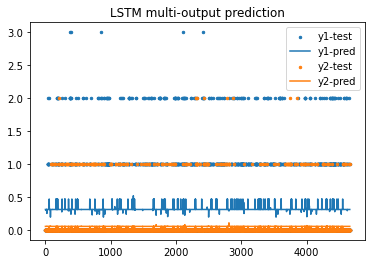

In [20]:
from sklearn.metrics import mean_squared_error
print("y1 MSE:%.4f" % mean_squared_error(y_test_text[:,0], y_pred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(y_test_text[:,1], y_pred[:,1])) 
print("y3 MSE:%.4f" % mean_squared_error(y_test_text[:,2], y_pred[:,2])) 
print("y4 MSE:%.4f" % mean_squared_error(y_test_text[:,3], y_pred[:,3])) 
print("y5 MSE:%.4f" % mean_squared_error(y_test_text[:,4], y_pred[:,4])) 
print("y6 MSE:%.4f" % mean_squared_error(y_test_text[:,5], y_pred[:,5])) 

x_ax = range(len(X_test_text))
plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, y_test_text[:,0],  s=6, label="y1-test")
plt.plot(x_ax, y_pred[:,0], label="y1-pred")
plt.scatter(x_ax, y_test_text[:,1],  s=6, label="y2-test")
plt.plot(x_ax, y_pred[:,1], label="y2-pred")
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

range_vals = [i/100 for i in range(1, 30)]


precision = []
recall = []
accuracy = []
for i in range_vals:
    precision.append(precision_score(y_test_text[1], y_pred[1]))
    recall.append(recall_score(y_test_text[1], y_pred[1]))
    accuracy.append(accuracy_score(y_test_text[1], y_pred[1]))

In [31]:
y_test_text[1]

array([0, 1, 1, 0, 1, 0])

D:\User\Documents\conda\envs\amlproj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\User\Documents\conda\envs\amlproj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\User\Documents\conda\envs\amlproj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

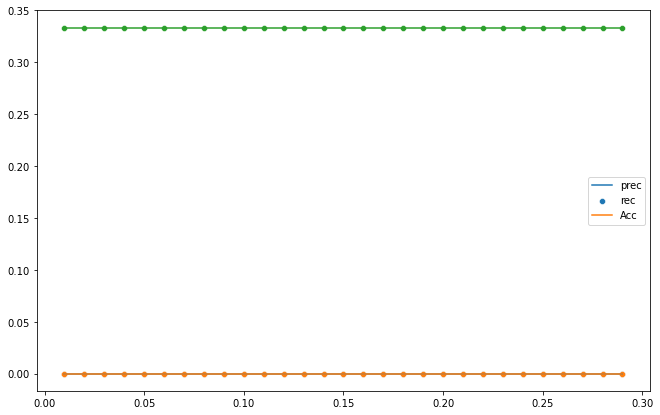

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 7))
sns.lineplot(range_vals, precision)
sns.scatterplot(range_vals, precision)
sns.lineplot(range_vals, recall)
sns.scatterplot(range_vals, recall)
sns.lineplot(range_vals, accuracy)
sns.scatterplot(range_vals, accuracy)
plt.legend(['prec', 'rec', 'Acc'])
plt.show()